In [1]:
import datetime
print(datetime.datetime.now())

2023-06-28 21:34:24.272007


In [2]:
# Supress scikit-learn's deprecations warnings.

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import itertools

import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load Data

In [5]:
greeks = pd.read_csv("../icr-identify-age-related-conditions/greeks.csv")
test = pd.read_csv("../icr-identify-age-related-conditions/test.csv")
train = pd.read_csv("../icr-identify-age-related-conditions/train.csv")

Alpha Identifies the type of age-related condition, if present.
* A No age-related condition. Corresponds to class 0.
* B, D, G The three age-related conditions. Correspond to class 1.
Beta, Gamma, Delta Three experimental characteristics.

Epsilon The date the data for this subject was collected. Note that all of the data in the test set was collected after the training set was collected.

In [7]:
greeks.info()
greeks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       617 non-null    object
 1   Alpha    617 non-null    object
 2   Beta     617 non-null    object
 3   Gamma    617 non-null    object
 4   Delta    617 non-null    object
 5   Epsilon  617 non-null    object
dtypes: object(6)
memory usage: 29.0+ KB


,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020


* Id Unique identifier for each observation.
* AB-GL Fifty-six anonymized health characteristics. All are numeric except for EJ, which is categorical.
* Class A binary target: 1 indicates the subject has been diagnosed with one of the three conditions, 0 indicates they have not.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [11]:
train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [9]:
#identify columns with NAs and the number of NAs
train.isnull().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [18]:
# feature_names = ['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BN', 'BQ', 'BR', 'BZ', 'CB', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DV', 'DY', 'EB', 'EE', 'EG', 'EH', 'EP', 'EU', 'FE', 'FI', 'FR', 'GB', 'GE', 'GF', 'GH', 'GI']
feature_names = ['AB', 'AF']
target = ['Class']

X = train[feature_names].to_numpy()
y = train[target].to_numpy()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

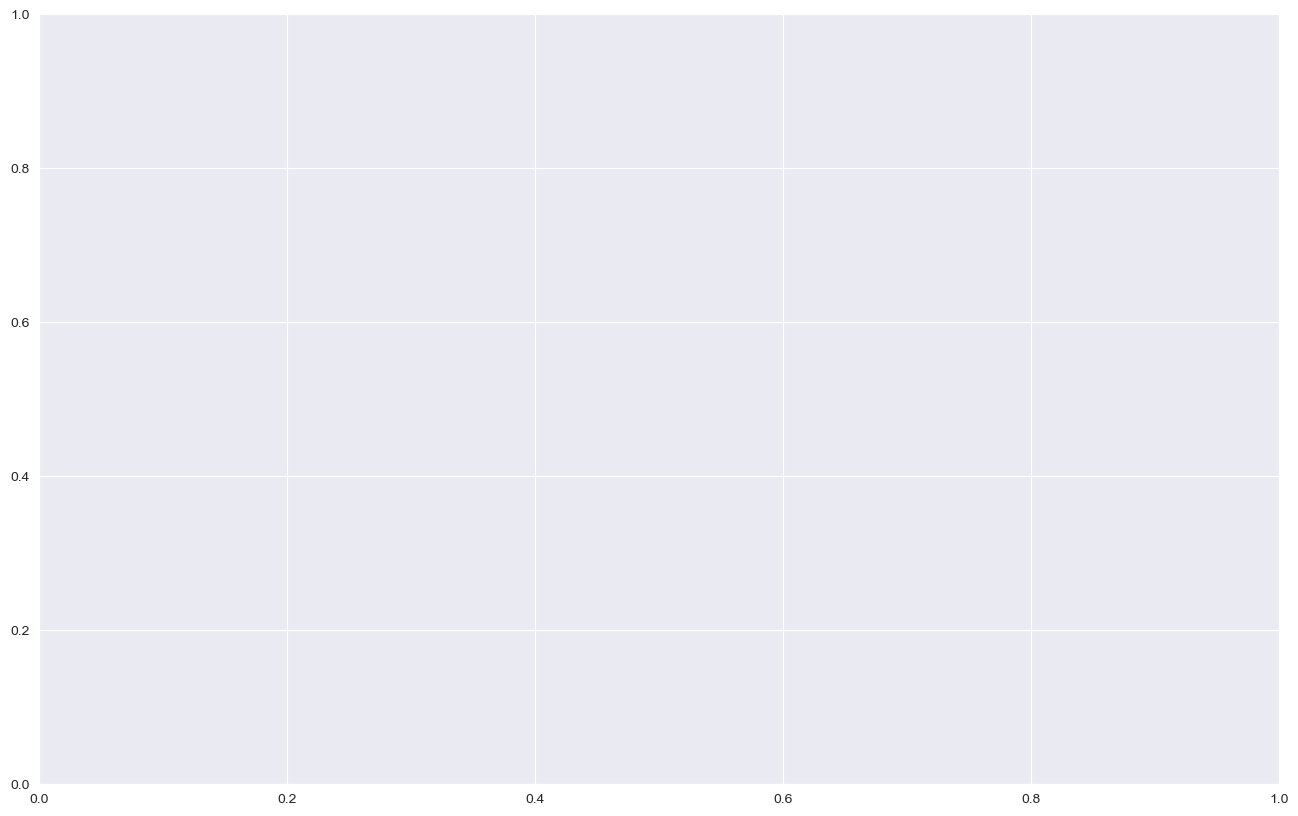

In [19]:
plt.figure(figsize=(16, 10));
plt.grid(True);

ind_d = y==1
ind_p = y==0
plt.scatter(X[ind_d,0], X[ind_d,1], marker='o', s=200, label='Diagnosed');
plt.scatter(X[ind_p,0], X[ind_p,1], marker='o', s=200, label="Not Diagnosed", alpha=0.8);

plt.legend(fontsize=16);
plt.title("Disease Dataset", fontsize=20);
plt.xlabel('AB)', fontsize=22);
plt.ylabel('AF', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.tight_layout();
#plt.savefig('out/default-data.png');